# PCA and LDA on Iris Dataset

*This notebook is inspired by this [PCA_in_Python notebook](https://github.com/jmausolf/Python_Tutorials/blob/master/PCA/PCA_in_Python.ipynb) and [article](https://sebastianraschka.com/faq/docs/lda-vs-pca.html).*
It uses the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)


### What is the difference between LDA and PCA for dimensionality reduction?
Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels.
- **LDA** is very useful to find dimensions which aim at **seperating cluster**, thus you will have to know clusters before. LDA is not necessarily a classifier, but can be used as one. Thus LDA can only be used in **supervised learning**
  => *LDA is used to carve up multidimensional space.*LDA is for classification, it almost always outperforms Logistic Regression when modelling small data with well separated clusters. It also handles multi-class data and class imbalances.


- **PCA** is a general approach for **denoising and dimensionality reduction** and does not require any further information such as class labels in supervised learning. Therefore it can be used in **unsupervised learning**.
  => *PCA is used to collapse multidimensional space*. PCA allows the collapsing of hundreds of spatial dimensions into a handful of lower spatial dimensions while preserving 70% - 90% of the important information. 3D objects cast 2D shadows. We can see the shape of an object from it's shadow. But we can't know everything about the shape from a single shadow. By having a small collection of shadows from different (globally optimal) angles, then we can know most things about the shape of an object. PCA helps reduce the 'Curse of Dimensionality' when modeling.



We can picture **PCA** as a technique that finds the directions of **maximal variance**:  
    
![](images/pca.png)  
In contrast to PCA, **LDA** attempts to find a feature subspace that maximizes **class separability** (note that LD 2 would be a very bad linear discriminant in the figure above).  

![](images/lda.png)

Remember that LDA makes assumptions about normally distributed classes and equal class covariances. If you are interested in an empirical comparison: A. M. Martinez and A. C. Kak. PCA versus LDA. Pattern Analysis and Machine Intelligence, IEEE Transactions on, 23(2):228–233, 2001). (PCA tends to result in better classification results in an image recognition task if the number of samples for a given class was relatively small.)

### 1.Visualizing PCA (and LDA) based on Iris dataset

#### Method 1 - PCA and LDA visualization of 2 components, using sklearn build-in load_iris() and numpy arrays

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

In [3]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

Text(0.5, 1.0, 'PCA of IRIS dataset')

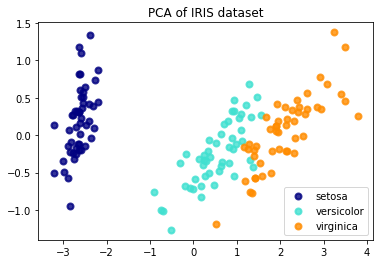

In [5]:
# PCA plot
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0],
                X_pca[y == i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


Text(0.5, 1.0, 'LDA of IRIS dataset')

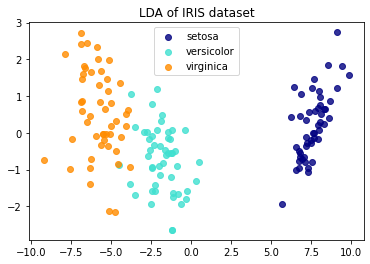

In [6]:
# LDA plot
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], 
                X_lda[y == i, 1], 
                alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')


#### Method 2 - PCA visualization of 2 components, using pandas dataframe and local file

In [7]:
import pandas as pd

#df = pd.read_csv(
#    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
#    header=None, 
#    sep=',')

df = pd.read_csv('data/iris_data.csv')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Select Columns (Variables) on which to run PCA
X = df.loc[:, 'sepal_len':'petal_wid'].values
y = df.loc[:, 'class'].values

pca = PCA() #If we do not specify how many components, all are included
X_pca = pca.fit(X).transform(X)

In [9]:
target_names = df['class'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

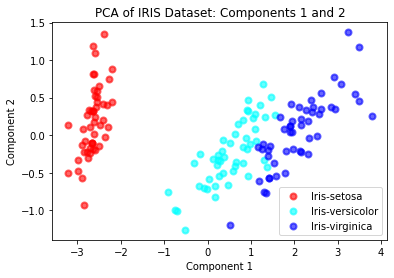

In [10]:
def pca_scatter(Xpca, pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2

    for color, target_name in zip(colors, target_names):
        plt.scatter(Xpca[y == target_name, pca1], 
                    Xpca[y == target_name, pca2], 
                    color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS Dataset: Components {} and {}'.format(pca1+1, pca2+1))
    plt.xlabel('Component {}'.format(pca1+1))
    plt.ylabel('Component {}'.format(pca2+1))
    plt.show()
    
pca_scatter(X_pca, 0, 1)

### 2. Selecting Components
Since the aim of PCA is data reduction, we need some criteria or we will have the same number of variables after a PCA.

One rule of thumb is that **a component should not be retained unless it has an eigenvalue greater than or equal to one** (the ‘Kaiser’ criterion).



#### How can we evaluate the eigenvalues?  

This depends on the approach taken in making the calculation. While I would recommend using the default PCA algorithms in Sklearn, another approach is simply using NumPy. I demonstrate both below with the Iris data.

##### Eigen values Method 1 - using Numpy

In [11]:
#Using Numpy on the Previously Defined X-Y
import numpy as np
from sklearn.preprocessing import StandardScaler

#Covariance Matrix
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[4.22484077 0.24224357 0.07852391 0.02368303]
Eigenvectors 
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


##### Eigen values Method 2 - using SKlearn

In [12]:
#Using Sklearn (As Performed Above)
from sklearn.decomposition import PCA
pca = PCA() #If we do not specify how many components, all are included

X_pca = pca.fit(X).transform(X)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[4.22484077 0.24224357 0.07852391 0.02368303]
Eigenvectors 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


Note: There are a number of criterion for accepting a principal component.  

The **Kaiser criterion is simple to implement**, but a more rigorous method known an Parallel Analysis can also be used. A program could be written to evaluate this in Python. Here is an example of the implementation in [Stata](https://stats.idre.ucla.edu/stata/faq/how-to-do-parallel-analysis-for-pca-or-factor-analysis-in-stata/).  

Using the Kaiser criterion, only the first principal component is significant and should be analyzed.

### 3. Visualizing EIGENVALUES
Related to the Kaiser criterion and component selection, one visual method of selection is known as a scree plot, an example of which is below.


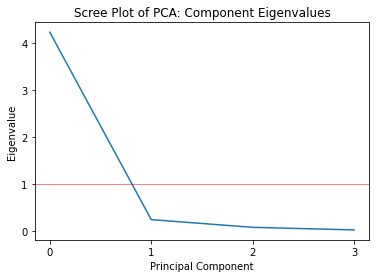

In [13]:
def scree_plot(pca):
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

pca = PCA() #If we do not specify how many components, all are included
X_pca = pca.fit(X).transform(X)
scree_plot(pca)

We can see that that the first component [0] is the only one above the line "1". We should not select additional components.

### 4. Variance Explained
Related to scree plots and eigenvalues is the variance explained (which is directly related to the eigenvalues). 
This can also be visualized.

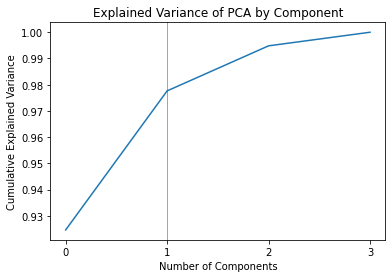

In [14]:
def var_explained(pca):
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()

pca = PCA() #If we do not specify how many components, all are included
X_pca = pca.fit(X).transform(X)
var_explained(pca)

We can see that `92.5%` of the variance is explained (and retained) by the First component (Component `0`).

And `98%` is explained by the first 2 components (components `0` and `1`).

### 5. Examining PCA loadings
Another facet of PCA is examining the `component loadings` or components. This allows us to see how informative a particular variable is for the principal component. Paying attention to the loadings is particularly useful in scale construction using PCA (or PCA in combination with Cronbach's Alpha and Factor Analysis).


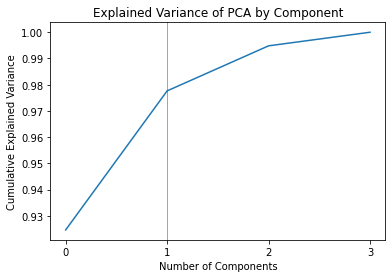

           Component 1  Component 2  Component 3  Component 4
sepal_len     0.361590    -0.082269     0.856572     0.358844
sepal_wid     0.656540     0.729712    -0.175767    -0.074706
petal_len    -0.580997     0.596418     0.072524     0.549061
petal_wid     0.317255    -0.324094    -0.479719     0.751121


In [15]:
#Component Loadings

def loadings(pca):
    loadings = pca.components_
    results = pd.DataFrame(loadings)
    results.columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
    results.index=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
    print(results)

pca = PCA() #If we do not specify how many components, all are included
X_pca = pca.fit(X).transform(X)
var_explained(pca)
loadings(pca)

In assessing the loadings, we are concerned with the **magnitude** of the loading on an absolute value scale [0,1], where **values closer to one are viewed as more informative** of the construct represented by the principal component.

For the loadings above, we can see that both `sepal width` and `petal length` are highly informative of the first component, which might be thought of as iris type.